In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from image_utils import *
from pathlib import Path
import datetime
import matplotlib.pyplot as plt
import numpy as np

def get_date(path):
    """Date from path"""

    try:
        date = str(path).split('\\')[-1].split('_')[0]
        year = int(date[:4])
        month = int(date[4:6])
        day = int(date[6:])
        date = datetime.date(year, month, day)
    except:
        return None

    return date

def show_dif(img, date):
    fig, ax = plt.subplots(1,3, figsize = (9,3))
    ax[0].imshow(img[0], cmap = 'gray_r')
    ax[1].imshow(img[1], cmap = 'gray_r')
    ax[2].imshow(img[0]/np.max(img[0]) - img[1]/np.max(img[1]), cmap = 'gray_r')
    plt.suptitle(date)
    plt.show()

## Load alignment .msr

In [3]:
path = Path(f'Y:\\staff\\LowCost\\fse\\smb\\Vlijm\\Frank Mol\\Abberior_STED_RAW\\Aligments_STED_microscopy\\_Oil_Objective')

In [4]:
msr_list = list(path.glob('*.msr'))

2023-12-04 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231204_23C_tetra.msr


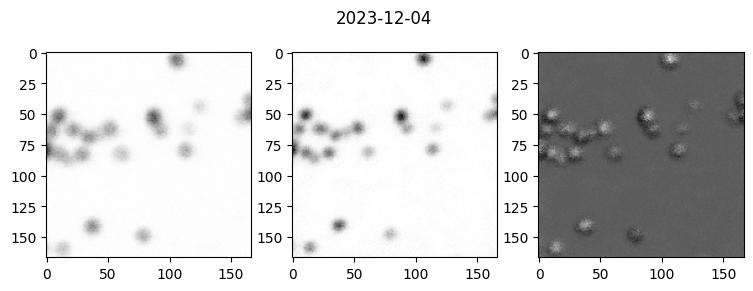

2023-12-11 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231211_23C_tetra.msr


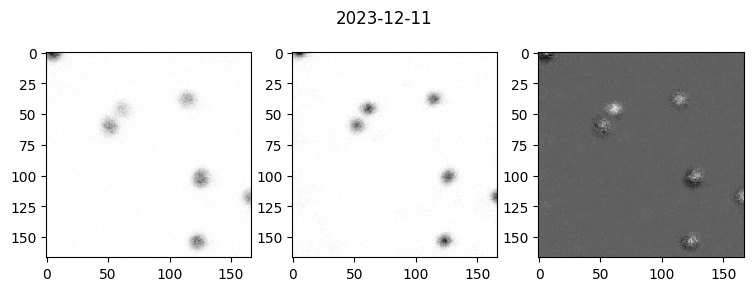

2023-12-12 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231212_23C_tetra.msr


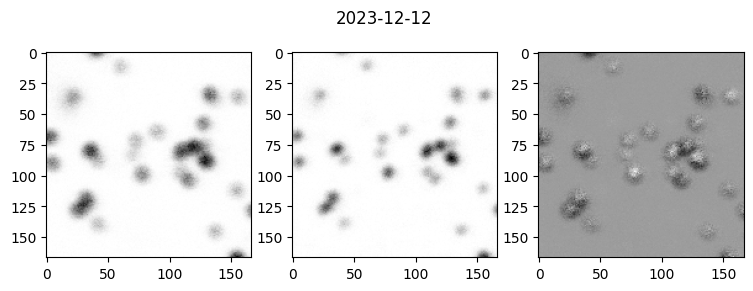

2023-12-13 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231213_23C_tetra.msr


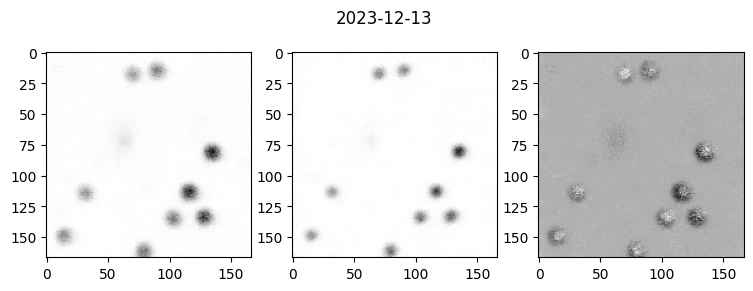

2023-12-14 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231214_23C_tetra.msr


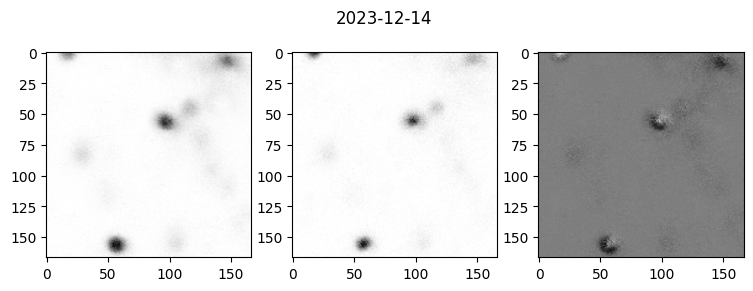

2023-12-15 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231215_23C_crimson-20nm.msr
2023-12-15 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231215_23C_tetra.msr


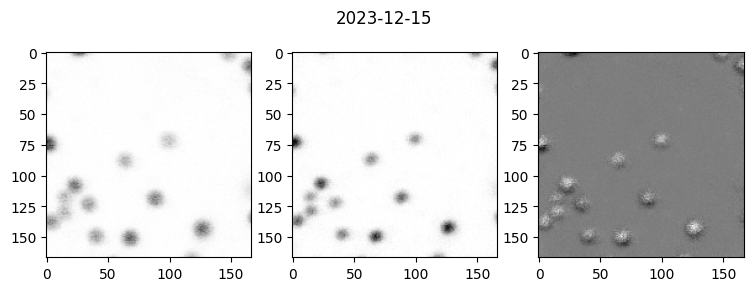

2023-12-18 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231218_23C_tetra.msr


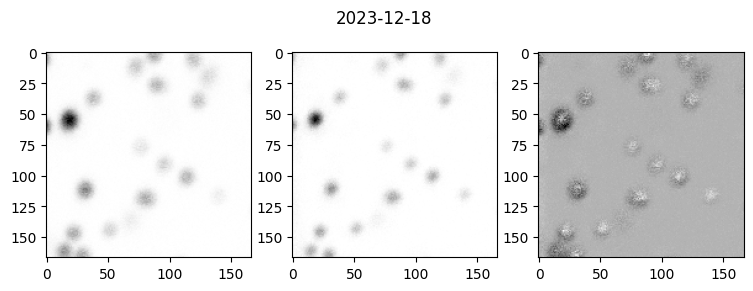

2023-12-19 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231219_23C_tetra.msr


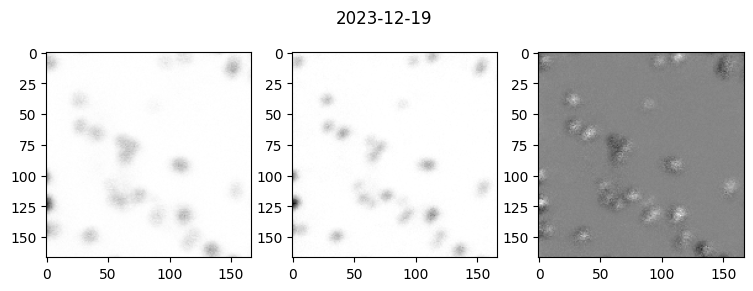

2023-12-20 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20231220_23C_tetra.msr


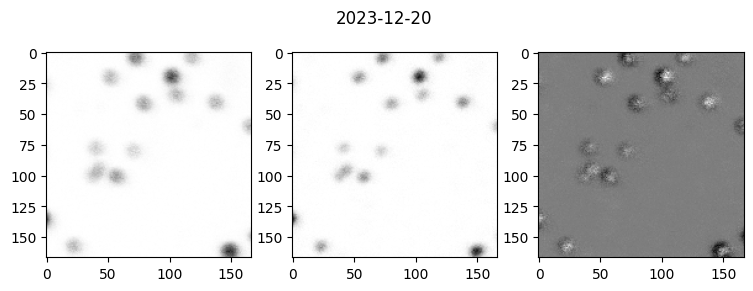

2024-01-09 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20240109_23C_tetra.msr


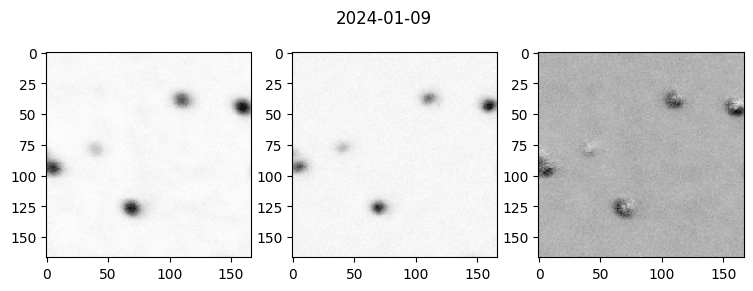

2024-01-10 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20240110_23C_tetra.msr


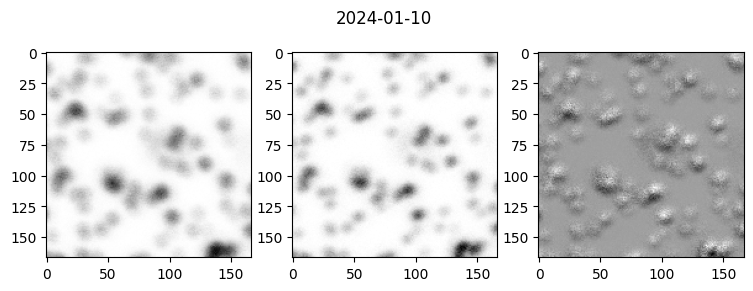

2024-01-12 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20240112_23C_tetra.msr


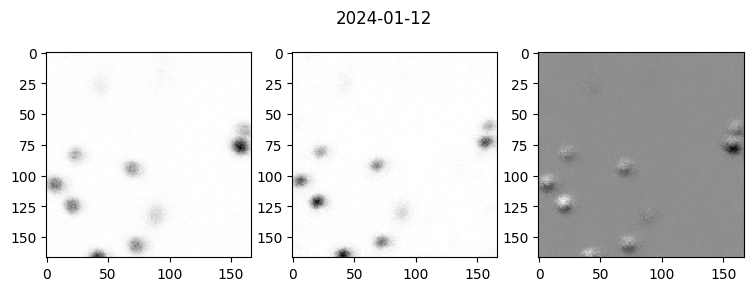

2024-01-18 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20240118_23C_tetra.msr


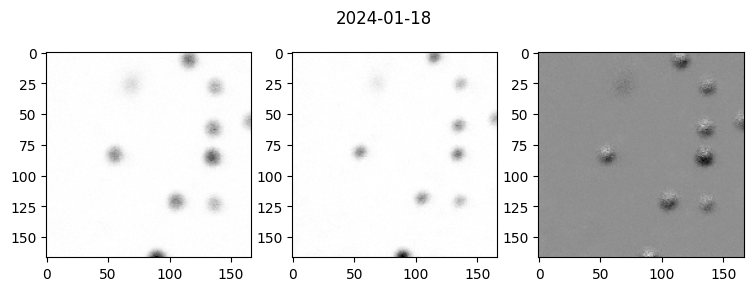

2024-01-19 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20240119_23C_tetra.msr


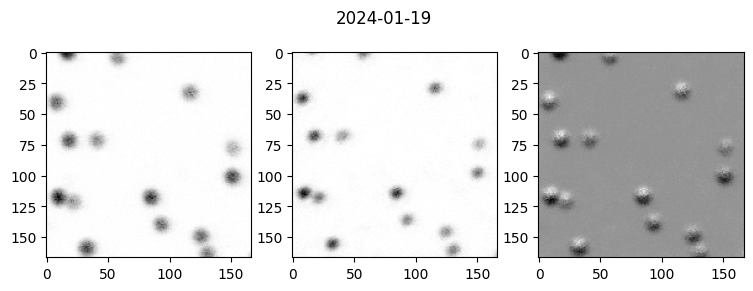

2024-01-23 Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\20240123_23C_tetra.msr


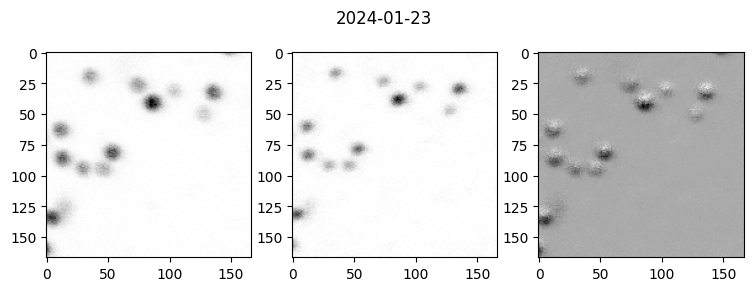

None Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\Template_new_meas.msr
None Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\_20210622_2D_STED_Percentages.msr
None Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\_20210622_3D_STED_focus nofocus.msr
None Y:\staff\LowCost\fse\smb\Vlijm\Frank Mol\Abberior_STED_RAW\Aligments_STED_microscopy\_Oil_Objective\_20210622_3D_STED_Percentages.msr


In [5]:
for alignment_path in list(msr_list[-20:]):
    date = get_date(alignment_path)
    print(date, str(alignment_path))
    if date:
        path_test = alignment_path
        try:
            imp = read_msr_imps(path_test, config='Conf_Overlay-640-560').data('CYX')
            show_dif(imp, date)
        except:
            continue